In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_oil.csv to train_oil.csv
Saving oil_test.csv to oil_test.csv


In [1]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Считываем тренировочные данные
train = pd.read_csv("train_oil.csv")

print(f"Train dataset shape: {train.shape}")

Train dataset shape: (309, 20)


In [3]:
# Считываем тестовые данные
test = pd.read_csv("oil_test.csv")

print(f"Test dataset shape: {test.shape}")

Test dataset shape: (133, 19)


In [4]:
train['Onshore/Offshore'].value_counts()

ONSHORE             218
OFFSHORE             86
ONSHORE-OFFSHORE      5
Name: Onshore/Offshore, dtype: int64

## Предобработка данных

### Тренировочный набора данных

In [5]:
train = train.drop(columns=['Country', 'Basin name', 'Region', 'Longitude', 'Latitude'])

In [6]:
train.isna().sum()

Field name                        0
Reservoir unit                    0
Tectonic regime                   0
Operator company                  0
Onshore/Offshore                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

In [7]:
train.head()

,Field name,Reservoir unit,Tectonic regime,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,COMPRESSION/EVAPORITE,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),EXTENSION,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,COMPRESSION/EVAPORITE,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,EXTENSION,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),COMPRESSION,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [8]:
tmp = train.copy()
tmp = tmp['Tectonic regime'].str.get_dummies('/').add_prefix('regime_').reset_index(drop=True)
tmp.head()

,regime_BASEMENT-I,regime_COMPRESSION,regime_DIAPIR,regime_EROSION,regime_EVAPORITE,regime_EXTENSION,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
tmp.shape

(309, 16)

In [10]:
train_full = pd.concat([train, tmp], axis=1)
train_full

,Field name,Reservoir unit,Tectonic regime,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,...,regime_GRAVITY,regime_INVERSION,regime_LINKED,regime_REACTIVATION,regime_SHALE,regime_STRIKE-SLIP,regime_SYNSEDIMENTATION,regime_TRANSPRESSION,regime_TRANSTENSION,regime_UPLIFT
0,ZHIRNOV,MELEKESKIAN,COMPRESSION/EVAPORITE,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,...,0,0,0,0,0,0,0,0,0,0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),EXTENSION,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,...,0,0,0,0,0,0,0,0,0,0
2,ABQAIQ,ARAB D,COMPRESSION/EVAPORITE,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,...,0,0,0,0,0,0,0,0,0,0
3,MURCHISON,BRENT,EXTENSION,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,...,0,0,0,0,0,0,0,0,0,0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),COMPRESSION,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,HIDES,IMBURU-TORO,COMPRESSION,OIL SEARCH LTD,ONSHORE,GAS-CONDENSATE,CONTINUING DEVELOPMENT,THRUST,9905,JURASSIC-CRETACEOUS,...,0,0,0,0,0,0,0,0,0,0
305,DRAKE POINT,DRAKE POINT-INTREPID INLET,COMPRESSION/EVAPORITE/EXTENSION/LINKED,PANARCTIC OILS,ONSHORE,GAS,UNDEVELOPED,FORELAND,3390,JURASSIC,...,0,0,1,0,0,0,0,0,0,0
306,ALTAMONT-BLUEBELL,GREEN RIVER AND COLTON/WASATCH,COMPRESSION,NUMEROUS,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250,PALEOGENE,...,0,0,0,0,0,0,0,0,0,0
307,BELL CREEK,MUDDY,COMPRESSION,SAMUEL GARY,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,4300,CRETACEOUS,...,0,0,0,0,0,0,0,0,0,0


In [11]:
tmp = train.copy()
tmp = tmp['Structural setting'].str.get_dummies('/').add_prefix('Structural setting_').reset_index(drop=True)
train_full = pd.concat([train_full, tmp], axis=1)
train_full

,Field name,Reservoir unit,Tectonic regime,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,...,Structural setting_FORELAND,Structural setting_INTRACRATONIC,Structural setting_INVERSION,Structural setting_PASSIVE MARGIN,Structural setting_RIFT,Structural setting_SALT,Structural setting_SUB-SALT,Structural setting_SUB-THRUST,Structural setting_THRUST,Structural setting_WRENCH
0,ZHIRNOV,MELEKESKIAN,COMPRESSION/EVAPORITE,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,...,1,0,0,0,0,0,0,0,0,0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),EXTENSION,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,...,0,0,0,1,0,0,0,0,0,0
2,ABQAIQ,ARAB D,COMPRESSION/EVAPORITE,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,...,1,0,0,0,0,0,0,0,0,0
3,MURCHISON,BRENT,EXTENSION,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,...,0,0,0,0,1,0,0,0,0,0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),COMPRESSION,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,HIDES,IMBURU-TORO,COMPRESSION,OIL SEARCH LTD,ONSHORE,GAS-CONDENSATE,CONTINUING DEVELOPMENT,THRUST,9905,JURASSIC-CRETACEOUS,...,0,0,0,0,0,0,0,0,1,0
305,DRAKE POINT,DRAKE POINT-INTREPID INLET,COMPRESSION/EVAPORITE/EXTENSION/LINKED,PANARCTIC OILS,ONSHORE,GAS,UNDEVELOPED,FORELAND,3390,JURASSIC,...,1,0,0,0,0,0,0,0,0,0
306,ALTAMONT-BLUEBELL,GREEN RIVER AND COLTON/WASATCH,COMPRESSION,NUMEROUS,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250,PALEOGENE,...,1,0,0,0,0,0,0,0,0,0
307,BELL CREEK,MUDDY,COMPRESSION,SAMUEL GARY,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,4300,CRETACEOUS,...,1,0,0,0,0,0,0,0,0,0


In [12]:
train_full = pd.get_dummies(train_full, columns=['Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology'])

train_full.drop(['Tectonic regime'], axis=1, inplace=True)
train_full.drop(['Structural setting'], axis=1, inplace=True)
train_full.shape

(309, 90)

In [13]:
train_full = train_full.drop(columns=['Field name', 'Reservoir unit', 'Operator company'])
train_full.shape

(309, 87)

In [14]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train_full['Onshore/Offshore'] = le.fit_transform(train_full['Onshore/Offshore'])

train_full.loc[:, train_full.dtypes == object].columns

Index([], dtype='object')

In [15]:
mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'OFFSHORE': 0, 'ONSHORE': 1, 'ONSHORE-OFFSHORE': 2}

### Тестовый набор данных

In [16]:
test = test.drop(columns=['Country', 'Basin name', 'Region', 'Longitude', 'Latitude'])
test.isna().sum()

Field name                        0
Reservoir unit                    0
Tectonic regime                   0
Operator company                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

In [17]:
tmp = test.copy()
tmp = tmp['Tectonic regime'].str.get_dummies('/').add_prefix('regime_').reset_index(drop=True)
test_full = pd.concat([test, tmp], axis=1)

In [18]:
tmp = test.copy()
tmp = tmp['Structural setting'].str.get_dummies('/').add_prefix('Structural setting_').reset_index(drop=True)
test_full = pd.concat([test_full, tmp], axis=1)

In [19]:
test_full = pd.get_dummies(test_full, columns=['Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology'])

test_full.drop(['Tectonic regime'], axis=1, inplace=True)
test_full.drop(['Structural setting'], axis=1, inplace=True)
test_full.shape

(133, 89)

In [20]:
test_full = test_full.drop(columns=['Field name', 'Reservoir unit', 'Operator company'])
test_full.shape

(133, 86)

In [21]:
train_col = train_full.columns
test_col = test_full.columns
cols_int = set(train_col) & set(test_col)
len(cols_int)

74

In [22]:
cols_int

{'Depth',
 'Hydrocarbon type_GAS',
 'Hydrocarbon type_GAS-CONDENSATE',
 'Hydrocarbon type_OIL',
 'Lithology_CHALK',
 'Lithology_CHALKY LIMESTONE',
 'Lithology_CONGLOMERATE',
 'Lithology_DOLOMITE',
 'Lithology_DOLOMITIC LIMESTONE',
 'Lithology_LIMESTONE',
 'Lithology_LOW-RESISTIVITY SANDSTONE',
 'Lithology_SANDSTONE',
 'Lithology_SHALY SANDSTONE',
 'Lithology_SILTSTONE',
 'Lithology_THINLY-BEDDED SANDSTONE',
 'Lithology_VOLCANICS',
 'Permeability',
 'Porosity',
 'Reservoir period_CARBONIFEROUS',
 'Reservoir period_CARBONIFEROUS-PERMIAN',
 'Reservoir period_CRETACEOUS',
 'Reservoir period_CRETACEOUS-PALEOGENE',
 'Reservoir period_DEVONIAN',
 'Reservoir period_JURASSIC',
 'Reservoir period_NEOGENE',
 'Reservoir period_ORDOVICIAN',
 'Reservoir period_PALEOGENE',
 'Reservoir period_PALEOGENE-NEOGENE',
 'Reservoir period_PERMIAN',
 'Reservoir period_PROTEROZOIC',
 'Reservoir period_SILURIAN',
 'Reservoir period_TRIASSIC',
 'Reservoir period_TRIASSIC-JURASSIC',
 'Reservoir status_CONTINUING D

In [23]:
y = train_full['Onshore/Offshore']
train_full = train_full[cols_int]
test_full = test_full[cols_int]

In [24]:
print(train_full.shape)
print(test_full.shape)

(309, 74)
(133, 74)


In [25]:
corr = train_full.corr()

correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.add(colname)

correlated_features

{'regime_STRIKE-SLIP'}

In [26]:
train_full.drop(columns=['regime_BASEMENT-I'], inplace=True)
test_full.drop(columns=['regime_BASEMENT-I'], inplace=True)

In [27]:
print(test_full.shape)
print(train_full.shape)

(133, 73)
(309, 73)


In [28]:
X = train_full.copy()

In [29]:
print(X.shape) 
print(y.shape)

(309, 73)
(309,)


## Обучение модели

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (216, 73), (216,)
Train dataset size: (93, 73), (93,)


In [31]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8494623655913979
CPU times: user 223 ms, sys: 21.5 ms, total: 244 ms
Wall time: 477 ms


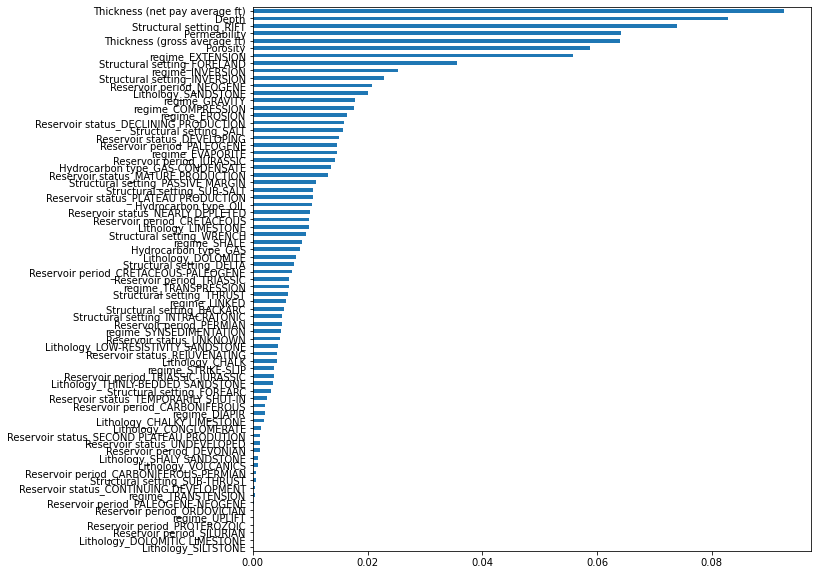

In [32]:
importances = clf.feature_importances_

forest_importances = pd.Series(importances, index=X.columns)

forest_importances = forest_importances.sort_values()

plt.figure(figsize=(10,10))
forest_importances.plot(kind='barh')
plt.show()

In [33]:
len(forest_importances[forest_importances > 0.0011181362767552299])

60

In [34]:
train_full = train_full[forest_importances[forest_importances > 0.0011181362767552299].index]
test_full = test_full[forest_importances[forest_importances > 0.0011181362767552299].index]

X = train_full.copy()

print(X.shape) 
print(y.shape)

(309, 60)
(309,)


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (216, 60), (216,)
Train dataset size: (93, 60), (93,)


In [36]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9032258064516129
CPU times: user 194 ms, sys: 100 µs, total: 194 ms
Wall time: 210 ms


In [37]:
mapping

{'OFFSHORE': 0, 'ONSHORE': 1, 'ONSHORE-OFFSHORE': 2}

In [38]:
inv_map = {v: k for k, v in mapping.items()}
inv_map

{0: 'OFFSHORE', 1: 'ONSHORE', 2: 'ONSHORE-OFFSHORE'}

In [40]:
y_test_pred = clf.predict(test_full)

y_pred_test = pd.DataFrame(y_test_pred, columns=['Onshore/Offshore'])
y_pred_test = y_pred_test.reset_index()

y_pred_test['Onshore/Offshore'] = y_pred_test['Onshore/Offshore'].map(inv_map).fillna(y_pred_test['Onshore/Offshore'])

y_pred_test.to_csv("solution.csv", index=False)

# files.download("solution.csv")